## Main Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Preprocessing

In [2]:
df_train  = pd.read_csv("data/train.csv")
df_sample = pd.read_csv("data/sample_submission.csv")
df_test   = pd.read_csv("data/train.csv")

labels = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III' , 'Overweight_Level_I', 'Overweight_Level_II']

# drop id (not useful)
df_train.drop('id',axis=1,inplace=True)
df_test.drop('id',axis=1,inplace=True)

## Additional Features

In [3]:
df_train['BMI'] = (df_train['Weight'] / df_train['Height']**2)

In [4]:
numerical_cols   = df_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df_train.select_dtypes(include=[object]).columns.tolist()

num_numerical_cols = len(numerical_cols)
num_numerical_rows = num_numerical_cols // 4

num_categorical_cols = len(categorical_cols)
num_categorical_rows = num_categorical_cols // 4

In [5]:
from sklearn.model_selection import train_test_split

y = df_train['NObeyesdad']
x = df_train.copy().drop(columns=['NObeyesdad'])

categoricals_cols_no_result = [col for col in categorical_cols if col != "NObeyesdad"]
x = pd.get_dummies(x, columns=categoricals_cols_no_result, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

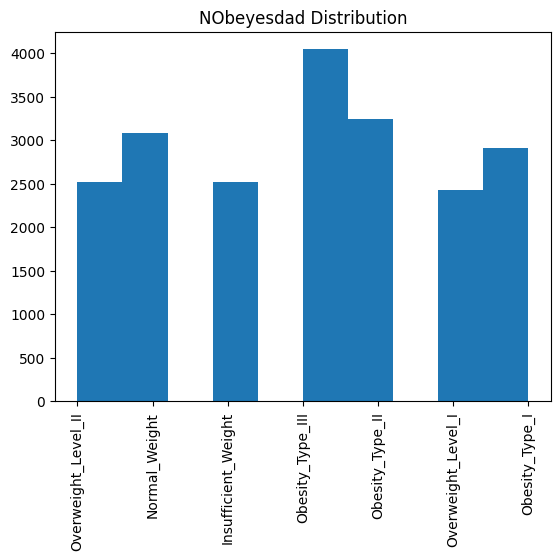

In [6]:
plt.hist(y)
plt.title(f'NObeyesdad Distribution')
plt.xticks(rotation=90)
plt.show() 


In [7]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

def get_stats(predictions):
  result = {}
  result['acc_score'] = accuracy_score(y_test,predictions)
  result['prec_score'] = precision_score(y_test,predictions,average='macro')
  result['recall_score'] = recall_score(y_test,predictions,average='macro')
  result['f1_score'] = f1_score(y_test,predictions,average='macro')
  result['confusion_matrix'] = confusion_matrix(y_test,predictions)
  return result

In [8]:
"""
Balancing the classes only decreases the accuracy

# Count the occurrences of each class in the 'NObeyesdad' column
class_counts = df_train['NObeyesdad'].value_counts()
print("Class counts before balancing:")
print(class_counts)

# Find the minimum count (least represented class)
min_count = class_counts.min()

# Balance the dataset by undersampling
df_train = df_train.groupby('NObeyesdad').apply(lambda x: x.sample(min_count)).reset_index(drop=True)
"""

'\nBalancing the classes only decreases the accuracy\n\n# Count the occurrences of each class in the \'NObeyesdad\' column\nclass_counts = df_train[\'NObeyesdad\'].value_counts()\nprint("Class counts before balancing:")\nprint(class_counts)\n\n# Find the minimum count (least represented class)\nmin_count = class_counts.min()\n\n# Balance the dataset by undersampling\ndf_train = df_train.groupby(\'NObeyesdad\').apply(lambda x: x.sample(min_count)).reset_index(drop=True)\n'

In [9]:
print(df_train.shape)

(20758, 18)


In [10]:
# number of na
mv = df_train.isna().sum().sum()

# number of duplicates
dv = df_train.duplicated().sum()

# there are no NAs or Duplicates in the test dataset
print(mv)
print(dv)

0
0


In [11]:
display(df_train.describe(include=[np.number]).T, df_train.describe(include=[object]).T)

,count,mean,std,min,25%,50%,75%,max
Age,20758.0,23.841804,5.688072,14.000000,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.450000,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.000000,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.000000,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.000000,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.000000,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.000000,0.000000,0.573887,1.000000,2.000000
BMI,20758.0,30.241842,8.333932,12.868541,24.088223,29.384757,37.011168,54.997991


,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


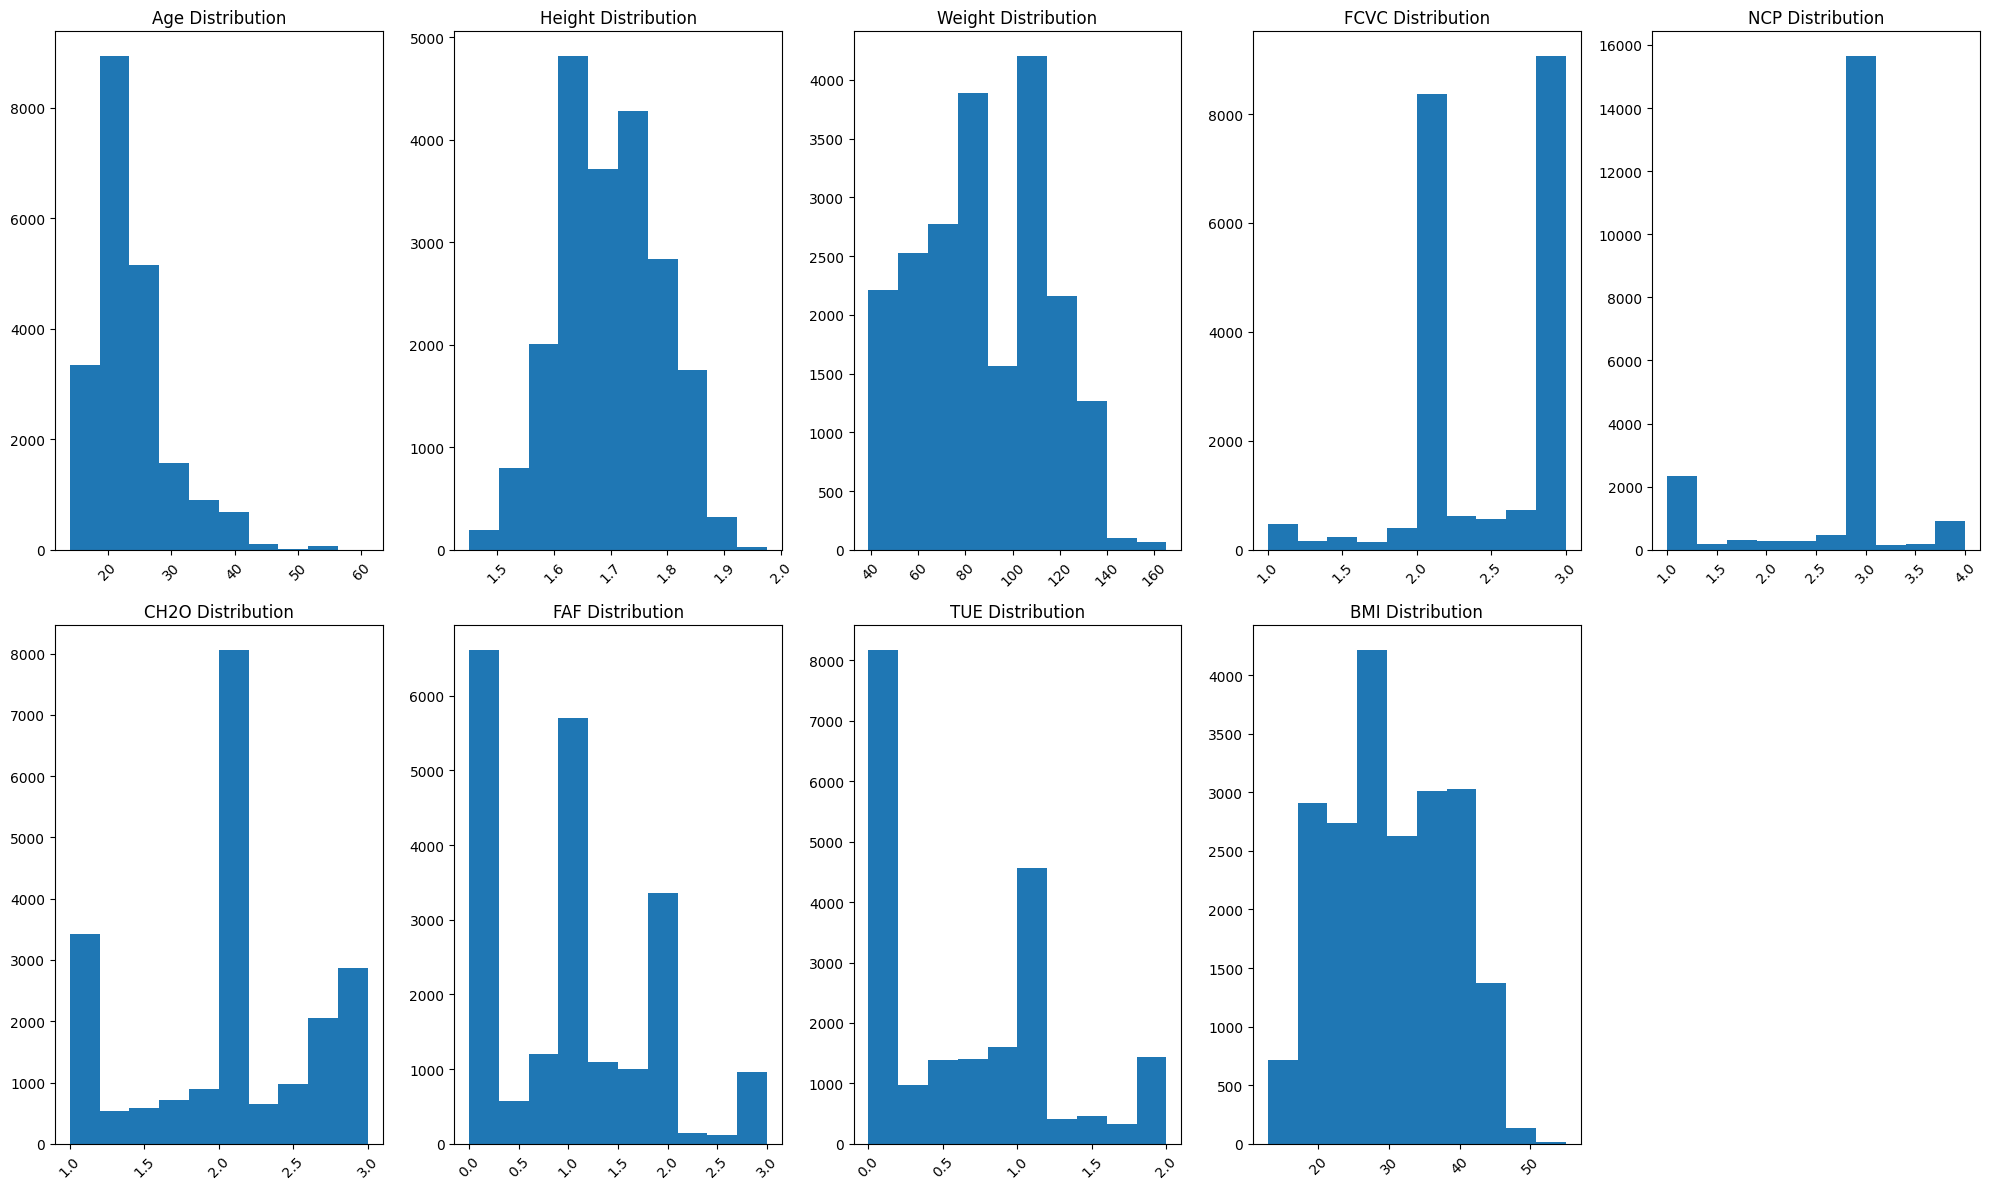

In [12]:
# numerical cols histogram
plt.figure(figsize=(20,6 * num_numerical_rows))
for i ,col in enumerate(numerical_cols,1):
    plt.subplot(num_numerical_rows, 5, i)
    plt.hist(df_train[col])
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 


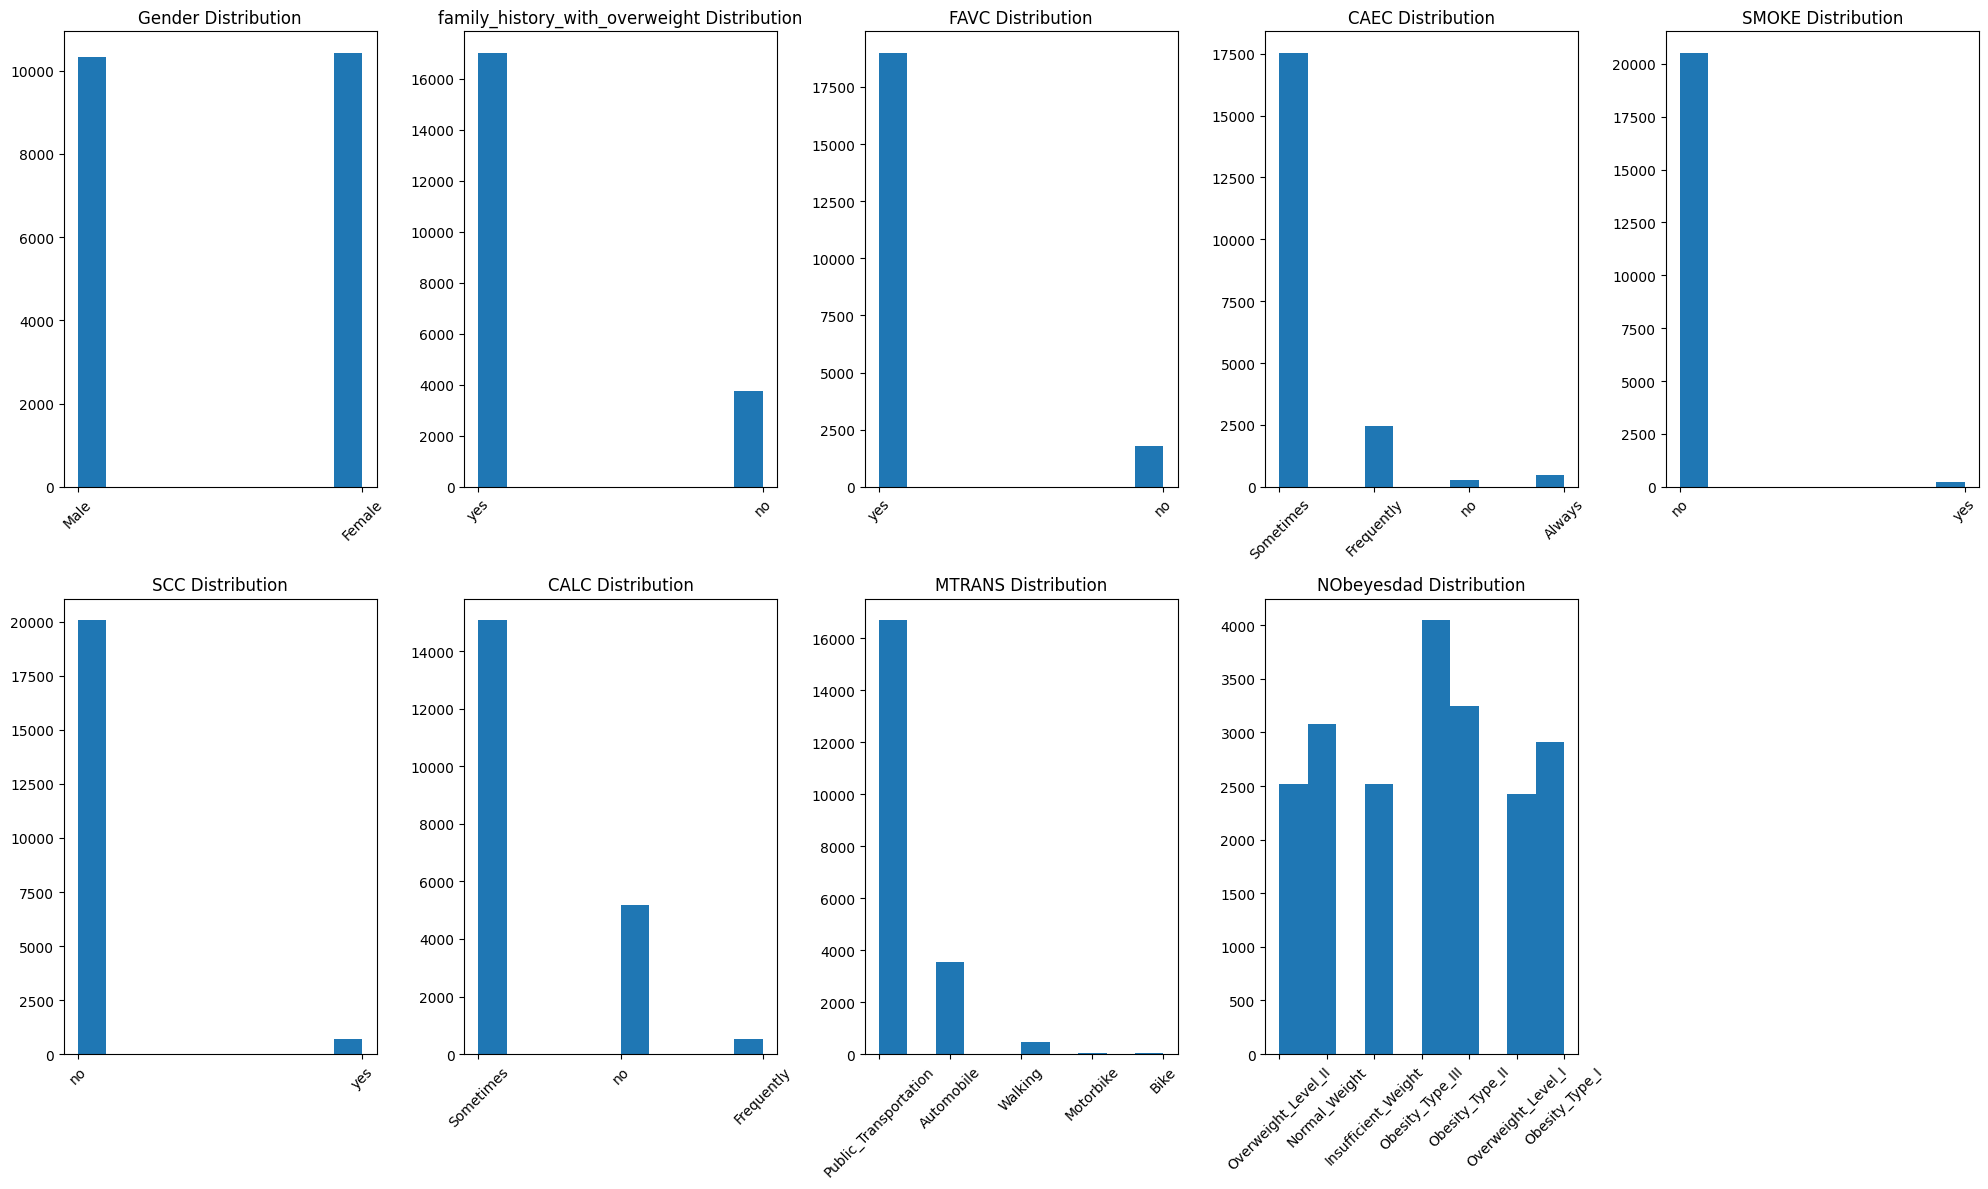

In [13]:
# categorical cols histogram
plt.figure(figsize=(20,6 * num_categorical_rows))
for i ,col in enumerate(categorical_cols,1):
    plt.subplot(num_categorical_rows, 5, i)
    plt.hist(df_train[col])
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 


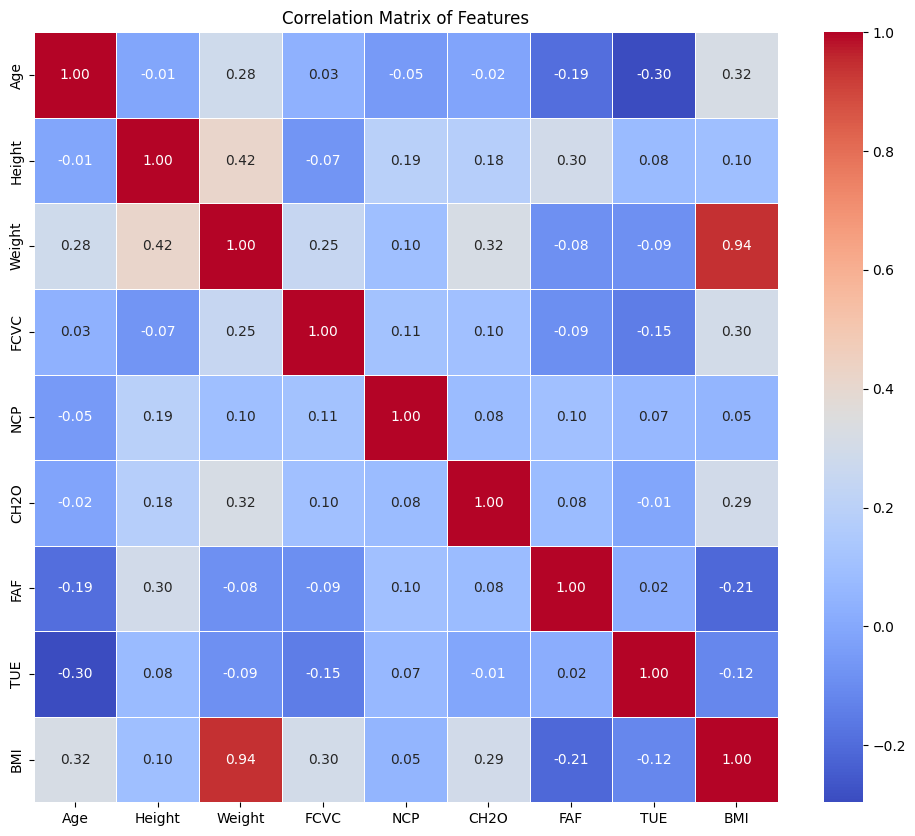

In [14]:
def corr(data):
    plt.figure(figsize=(12,10))
    sns.heatmap(data, annot=True, cmap='coolwarm', fmt='.2f', linewidths= 0.5)
    plt.title('Correlation Matrix of Features')
corr(df_train[numerical_cols].corr())

## Decision Tree

### Without FS

<Axes: >

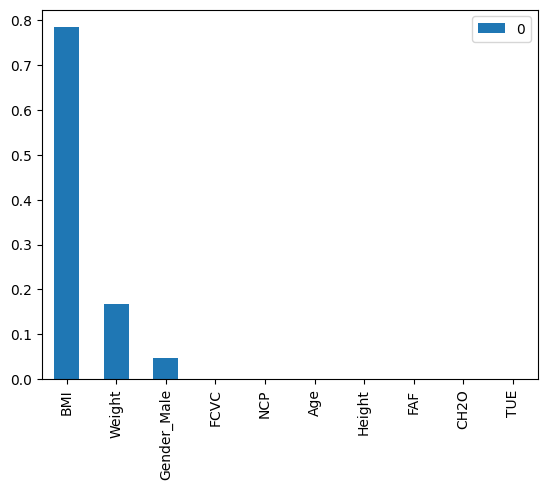

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(ccp_alpha=0.01)
clf = clf.fit(x_train,y_train)

predictions = clf.predict(x_test)

feature_importance = pd.DataFrame(clf.feature_importances_, index = x.columns).sort_values(0, ascending=False)
feature_importance.head(10).plot(kind='bar')

### With FS

In [16]:
from sklearn.feature_selection import RFE

max_acc = 0
best_features=0
max_features = x.shape[1]

for i in range(1,max_features):
  rfe = RFE(estimator=clf, n_features_to_select=i)

  rfe.fit(x_train, y_train)

  selected_features = x_train.columns[rfe.support_]
  print("Selected Features:", selected_features)

  x_train_rfe = rfe.transform(x_train)
  x_test_rfe = rfe.transform(x_test)

  clf.fit(x_train_rfe, y_train)
  predictions = clf.predict(x_test_rfe)

  acc = accuracy_score(y_test,predictions)
  if(acc > max_acc):
    max_acc = acc
    best_features = i

# .84
# 14
print(max_acc)
print(best_features)

Selected Features: Index(['BMI'], dtype='object')
Selected Features: Index(['Weight', 'BMI'], dtype='object')
Selected Features: Index(['Weight', 'BMI', 'Gender_Male'], dtype='object')
Selected Features: Index(['Weight', 'BMI', 'Gender_Male', 'MTRANS_Walking'], dtype='object')
Selected Features: Index(['Weight', 'BMI', 'Gender_Male', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')
Selected Features: Index(['Weight', 'BMI', 'Gender_Male', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')
Selected Features: Index(['Weight', 'BMI', 'Gender_Male', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')
Selected Features: Index(['Weight', 'BMI', 'Gender_Male', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')
Selected Features: Index(['Weight', 'BMI', 'Gender_Male', 'CALC_Somet

## K-Nearest-Neighbours

### Best K 


Best k by average accuracy: k = 10



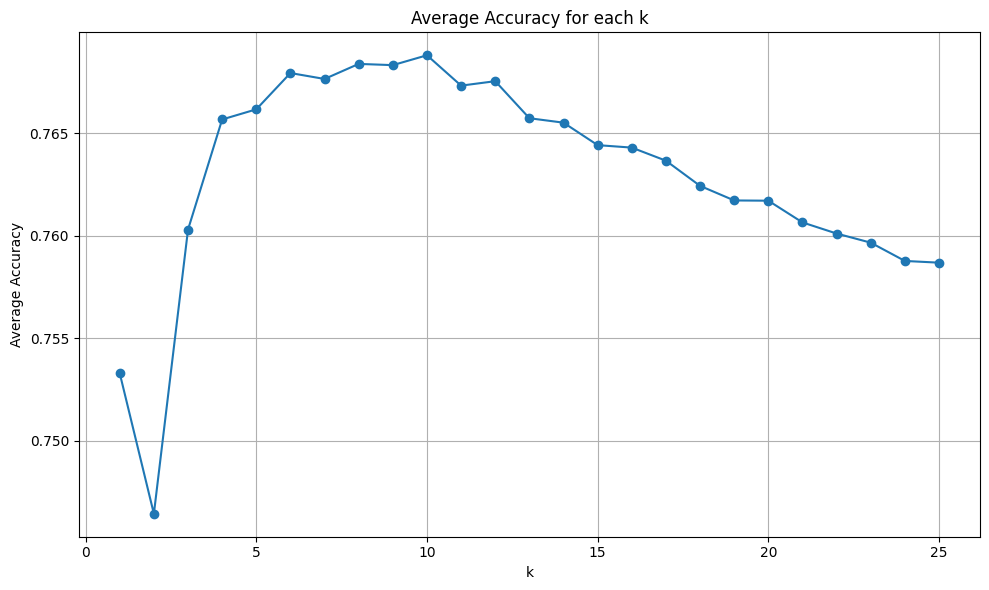

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from collections import defaultdict, Counter


number_of_runs = 20 # Change this number to run more or less iterations, the more this number the more accurate can be the results
number_of_neighbors = 25 # Change this number to evaluate more or less neighbors (not reccomended since higher neigbors has worse accuracy)

# Data structures to keep track
top_k_counts = Counter()
k_accuracy_map = defaultdict(list)

for run in range(1, number_of_runs + 1):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    k_accuracies = []

    for k in range(1,number_of_neighbors + 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train_scaled, y_train)
        preds = knn.predict(x_test_scaled)
        acc = accuracy_score(y_test, preds)
        k_accuracies.append((k, acc))

    # Sort by accuracy descending
    k_accuracies.sort(key=lambda tup: tup[1], reverse=True)

    # Track accuracies for average and top-k counting
    for i, (k, acc) in enumerate(k_accuracies):
        k_accuracy_map[k].append(acc)
        if i == 0:
            top_k_counts[k] += 1

    best_k, best_acc = k_accuracies[0]




# Average accuracy per k
avg_accuracies = {k: np.mean(accs) for k, accs in k_accuracy_map.items()}
sorted_avg = sorted(avg_accuracies.items(), key=lambda x: x[1], reverse=True)


best_avg_k, best_avg_acc = sorted_avg[0]
print(f"\nBest k by average accuracy: k = {best_avg_k}\n")

# Plot average accuracy vs k
ks = sorted(avg_accuracies.keys())
accs = [avg_accuracies[k] for k in ks]

plt.figure(figsize=(10, 6))
plt.plot(ks, accs, marker='o')
plt.title("Average Accuracy for each k")
plt.xlabel("k")
plt.ylabel("Average Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


### Without FS

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=best_avg_k)
knn = knn.fit(x_train_scaled, y_train)

predictions = knn.predict(x_test_scaled)
accuracy_score(y_test, predictions)

0.7692678227360308

### With FS

In [23]:
from sklearn.feature_selection import SequentialFeatureSelector

max_acc = 0
best_features=0
max_features = x.shape[1]

for i in range(1,max_features):
  sfs = SequentialFeatureSelector(
      estimator=knn,
      n_features_to_select=i, 
      direction='forward',
      scoring='accuracy',
      cv=5,
      n_jobs=-1
  )

  sfs.fit(x_train, y_train)

  selected_features = x_train.columns[sfs.get_support()]
  print("Selected Features:", selected_features)

  x_train_sfs = sfs.transform(x_train)
  x_test_sfs = sfs.transform(x_test)

  knn.fit(x_train_sfs, y_train)

  predictions = knn.predict(x_test_sfs)
  acc = accuracy_score(y_test, predictions)

  if(acc > max_acc):
    max_acc = acc
    best_features = i

print(max_acc)
print(best_features)

Selected Features: Index(['BMI'], dtype='object')
Selected Features: Index(['Weight', 'BMI'], dtype='object')
Selected Features: Index(['Age', 'Weight', 'BMI'], dtype='object')
Selected Features: Index(['Age', 'Weight', 'BMI', 'Gender_Male'], dtype='object')
Selected Features: Index(['Age', 'Weight', 'BMI', 'Gender_Male', 'MTRANS_Walking'], dtype='object')


KeyboardInterrupt: 

## Support Vector Machines

In [19]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

predictions = svc.predict(x_test)

### Support Vector Classifier

In [20]:
from sklearn.feature_selection import SequentialFeatureSelector

max_acc = 0
best_features=0
max_features = x.shape[1]

for i in range(1,max_features):
  sfs = SequentialFeatureSelector(
      estimator=svc,
      n_features_to_select=i, 
      direction='forward',
      scoring='accuracy',
      cv=5,
      n_jobs=-1
  )
  
  sfs.fit(x_train, y_train)

  selected_features = x_train.columns[sfs.get_support()]
  print("Selected Features:", selected_features)
  
  x_train_sfs = sfs.transform(x_train)
  x_test_sfs = sfs.transform(x_test)

  svc.fit(x_train_sfs, y_train)

  predictions = svc.predict(x_test_sfs)
  acc = accuracy_score(y_test, predictions)

  if(acc > max_acc):
    max_acc = acc
    best_features = i
    print("Current best:" + str(best_features))

print(max_acc)
print(best_features)

Selected Features: Index(['BMI'], dtype='object')
Current best:1
Selected Features: Index(['BMI', 'Gender_Male'], dtype='object')
Current best:2
Selected Features: Index(['Age', 'BMI', 'Gender_Male'], dtype='object')
Current best:3
Selected Features: Index(['Age', 'BMI', 'Gender_Male', 'CALC_Sometimes'], dtype='object')
Current best:4


KeyboardInterrupt: 

# Neural Networks

In [ ]:
from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

y_test_encoded = label_encoder.transform(y_test)

model = MLPClassifier(
    hidden_layer_sizes=(250, 150, 100),
    activation='relu',
    solver='adam',                    
    alpha=0.0001,                      
    batch_size='auto',
    learning_rate='adaptive',         
    max_iter=1000,                     
    early_stopping=True,               
    validation_fraction=0.2,          
    n_iter_no_change=10,          
)

model.fit(x_train_scaled, y_train_encoded)
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test_encoded, y_pred)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(y_test_encoded, y_pred, alpha=0.5, color="red", label="Predicted")
plt.scatter(y_test_encoded, y_test_encoded, alpha=0.5, color='blue', label='Actual')
plt.plot(y_test_encoded, y_test_encoded, color='green', linewidth=2)
plt.title('Neural Network Predicted vs. Actual Values')
plt.legend()
plt.show()

print(accuracy_score(y_test_encoded,y_pred)) # 0.87
print(classification_report(y_test_encoded, y_pred, target_names=labels))

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_encoded,y_pred), display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 8))
cm_display.plot(ax=ax)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()